<a href="https://colab.research.google.com/github/adityaverma123457/EDA-on-sales-data-/blob/main/Implementing_Gradient_Backpropagation_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>BackPropagation</font>

**There will be some functions that start with the word "grader" ex: grader_sigmoid(), grader_forwardprop(), grader_backprop() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir()
os.chdir('/content/drive/MyDrive')

## <font color='red'>Loading data </font>

In [ ]:
import pickle
import math
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('/content/drive/MyDrive/APPLIED AI ASSIGNMENTS ipynb/backpropogation assignment/data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

# <font color='red'>Task 1: Implementing backpropagation and Gradient checking </font>

<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

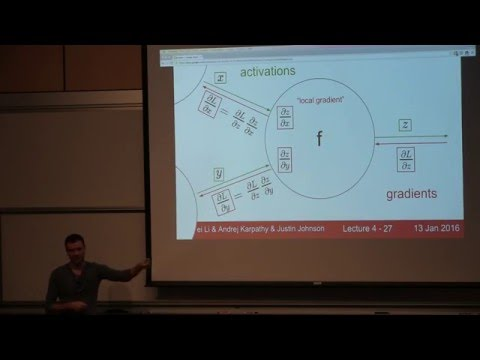

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")


*  <b>Write two functions<br>
    *  Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

    <pre>
    <font color='green'>
def forward_propagation(X, y, W):
        <font color='grey'>
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph, <br>         ..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig,dl variables
        </font>
        return (dictionary, which you might need to use for back propagation)
        <font color='grey'>
        </font>
</font>
</pre>
    *  <b>Backward propagation</b>(Write your code in<font color='blue'> def backward_propagation()</b></font>)
    </b>
    <pre>
    <font color='green'>
    def backward_propagation(L, W,dictionary):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # dictionary: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        # Hint: you can use dict type to store the required variables 
        # return dW, dW is a dictionary with gradients of all the weights
        </font>
        return dW
        </font>
</font>
</pre>

 ## <font color='red'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* Initilze the 9 weights from normal distribution with mean=0 and std=0.01

**Check below video and <a href='https://cs231n.github.io/neural-networks-3/'>this</a> blog**

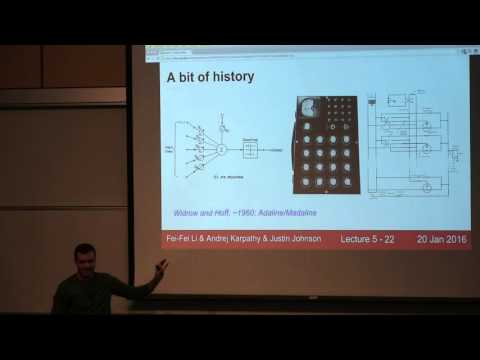

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

<br>
<br>
<br>

# <font color='red'>Task 1 </font>

## <font color='blue'>Forward propagation </font>

In [ ]:
def sigmoid(z):
  val=1/(1+ math.exp(-z))
  return val
    
def forward_propagation(x, y, w):
  results=dict()
  exp= math.exp((w[0]*x[0] + w[1]*x[1])**2 + w[5])
  tanh= math.tanh(w[6]+exp)
  p3= math.sin(w[2]*x[2]) * (w[3] * x[3] + w[4] * x[4]) + w[7]
  sig=sigmoid(p3)
  y_= tanh + sig * w[8]
  L= (y - y_)**2
  dL= -2*(y-y_)
  results['w1*f1']=w[0]*x[0]
  results['w2*f2']=w[1]*x[1]
  results['w3*f3']=w[2]*x[2]
  results['w4*f4']=w[3]*x[3]
  results['w5*f5']=w[4]*x[4]
  results['sin']=math.sin(w[2]*x[2])
  results['cos']=math.cos(w[2]*x[2])
  results['exp']=exp
  results['tanh']=tanh
  results['sigmoid']=sig
  results['loss']=L
  results['dy_pr']=dL
  results['y']=y_
  return results


<font color='cyan'>Grader function - 1</font>

In [ ]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='cyan'>Grader function - 2 </font>

In [ ]:
def grader_forwardprop(data):
    dl = (data['dy_pr']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

## <font color='blue'>Backward propagation</font>

In [ ]:
def backward_propagation(x,W,dict1):
  grad=dict ()
  dw1=dict1['dy_pr'] * (1 - dict1['tanh']**2) * dict1['exp'] * (dict1['w1*f1']+dict1['w2*f2']) * x[0] * 2
  dw2=dict1['dy_pr'] * (1 - dict1['tanh']**2) * dict1['exp'] * (dict1['w1*f1']+dict1['w2*f2']) * x[1] * 2
  dw3=dict1['dy_pr'] * dict1['sigmoid'] * (1-dict1['sigmoid']) * dict1['cos'] * x[2] * (dict1['w4*f4']+dict1['w5*f5']) * W[8]
  dw4=dict1['dy_pr'] * dict1['sigmoid'] * (1-dict1['sigmoid']) * dict1['sin'] * x[3] * W[8]
  dw5=dict1['dy_pr'] * dict1['sigmoid'] * (1-dict1['sigmoid']) * dict1['sin'] * x[4] * W[8]
  dw6=dict1['dy_pr'] * (1 - dict1['tanh']**2) * dict1['exp']
  dw7=dict1['dy_pr'] * (1 - dict1['tanh']**2)
  dw8=dict1['dy_pr'] * dict1['sigmoid'] * (1-dict1['sigmoid']) * W[8]
  dw9=dict1['dy_pr'] * dict1['sigmoid']
  grad['dw1']=dw1
  grad['dw2']=dw2
  grad['dw3']=dw3
  grad['dw4']=dw4
  grad['dw5']=dw5
  grad['dw6']=dw6
  grad['dw7']=dw7
  grad['dw8']=dw8
  grad['dw9']=dw9
  return grad


<font color='cyan'>Grader function - 3 </font>

In [ ]:
def grader_backprop(data):
    dw1=(data['dw1']==-0.22973323498702)
    dw2=(data['dw2']==-0.02140761471775293)
    dw3=(data['dw3']==-0.005625405580266319)
    dw4=(data['dw4']==-0.004657941222712423)
    dw5=(data['dw5']==-0.0010077228498574246)
    dw6=(data['dw6']==-0.6334751873437471)
    dw7=(data['dw7']==-0.561941842854033)
    dw8=(data['dw8']==-0.04806288407316517)
    dw9=(data['dw9']==-1.0181044360187037)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
d1=backward_propagation(X[0],w,d1)
grader_backprop(d1)

True

## <font color='blue'> Implement gradient checking</font>

In [ ]:
# IMPLEMENTING GRADIENT CHECKING 
W= list([0.92112651, 0.75651048, 0.45497931, 0.88753942, 0.88210431, 0.59010574, 0.11850274, 0.38950844, 0.9340459 ])
def gradient_checking(data_point_x,data_point_y, eps,W):
  dic=forward_propagation(data_point_x,data_point_y,W)
  #print(dic['dy_pr'])
  L=dic['loss']
  dW= list(np.array(list(backward_propagation(data_point_x,W,dic).values()))/dic['dy_pr'])
  approx_gradients = []
  for  i,word in enumerate(W):
    W[i]=(W[i] + eps)
    #print(W[i])
    Loss_up=forward_propagation(data_point_x,data_point_y,W)['y']
    #print(Loss_up)
    W[i]=(W[i] - 2*eps)
    #print(W[i])
    Loss_down=forward_propagation(data_point_x,data_point_y,W)['y']
    #print(Loss_down)
    grad=(Loss_up - Loss_down)/(2*eps)
    #print(grad)
    approx_gradients.append(grad)
  grad_check=np.linalg.norm(np.array(dW) - np.array(approx_gradients))/(np.linalg.norm(np.array(dW) + np.linalg.norm(np.array(approx_gradients))))
  return grad_check
print("gradient check score")
gradient_checking(X[0],y[0],eps=0.0001,W=W) 

gradient check score


1.9157562492016808e-05

# <font color='red'>Task 2: Optimizers

###<font color='blue'>Algorithm with Vanilla update of weights</font>

<font color='blue'>Plot between epochs and loss</font>

loss:0.04634055519729221 after epoch:1
loss:0.04711801317034701 after epoch:2
loss:0.0490461005182332 after epoch:3
loss:0.05441230471573531 after epoch:4
loss:0.06605481551403801 after epoch:5
loss:0.08038742032591525 after epoch:6
loss:0.0720095858335264 after epoch:7
loss:0.05516857115618801 after epoch:8
loss:0.048512490560804665 after epoch:9
loss:0.048060857411489466 after epoch:10
loss:0.049066283803411374 after epoch:11
loss:0.04879333420308065 after epoch:12
loss:0.04843293243288194 after epoch:13
loss:0.05198878249132385 after epoch:14
loss:0.06380703870686931 after epoch:15
loss:0.08092716371038063 after epoch:16
loss:0.06929411932411926 after epoch:17
loss:0.05296116567143621 after epoch:18
loss:0.048315523216749104 after epoch:19
loss:0.04843797072663201 after epoch:20
loss:0.04863720902730141 after epoch:21
loss:0.04854099843873343 after epoch:22
loss:0.05154495415434277 after epoch:23
loss:0.061633268438870195 after epoch:24
loss:0.07598424666970206 after epoch:25
loss:0

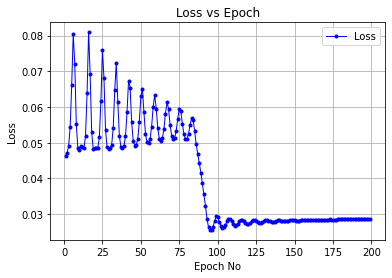

In [ ]:
#MOMENTUM BASED OPTIMIZER
W=np.random.normal(loc=0,scale=0.01,size=9)
epochs=200
eta=0.01
gamma=0.9
V_old=0
loss_dict={}
for epoch in range(1,epochs):
  for i in range(X.shape[0]):
   dict_fwd= forward_propagation(X[i],y[i],W)
   dW_bw=backward_propagation(X[0],W,dict_fwd)
   dW_old=np.array(list(dW_bw.values()))
   V_new=gamma*V_old + eta*dW_old
   W_new=(W - V_new)
   W=W_new
   V_old=V_new
#  eta*=0.95 
  loss_dict[epoch]=dict_fwd['loss']
  print("loss:{} after epoch:{}".format(dict_fwd['loss'],epoch)) 
print("final weights",W)

#PLOT LOSS VS EPOCH CURVE
import matplotlib.pyplot as plt
plt.grid()
plt.plot(np.arange(1,200),np.array(list(loss_dict.values())),'b.-',label='Loss',linewidth=1)
plt.xlabel('Epoch No')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()

In [ ]:
a=np.random.normal(loc=0,scale=0.01,size=9)
b=np.random.normal(loc=1,scale=0.01,size=9)
a
b
a/np.sqrt(b+0.001)

array([-0.00868461,  0.00171314, -0.01528073,  0.00601352,  0.01268788,
        0.00901479, -0.00143406,  0.00021176,  0.0024366 ])

In [ ]:
X.shape

(506, 5)

###<font color='blue'>Algorithm with Vanilla update of weights</font>

In [ ]:
##Adam Optimizer
from tqdm import tqdm
W=np.random.normal(loc=0,scale=0.01,size=9)
epochs=50
eta=0.001
beta2=0.8
beta1=0.9
alpha=0.001
eps=0.00001
gamma=0.9
V_old=0
moment_old=0
dict_loss={}
for epoch in tqdm(range(1,epochs)):
  print("epoch:{}".format(epoch))
  for i in range(X.shape[0]):
   dict_fwd= forward_propagation(X[i],y[i],W)
   dW_bw=backward_propagation(X[0],W,dict_fwd)
   dW_old=np.array(list(dW_bw.values()))

   V_new=beta2*V_old + (1-beta2)*(dW_old)**2
   #print("V_new",V_new)

   moment_new=beta1*moment_old + (1-beta1)*dW_old
   #print("moment_new",moment_new)

   moment_cap=moment_new/(1-beta1)
   #print("moment_cap",moment_cap)

   V_cap=V_new/(1-beta2)
   #print("V_cap",V_cap)
   
   W_new=W - alpha*(moment_cap)/np.sqrt(V_cap+eps)
   W=W_new
   V_old=V_new
   moment_old=moment_new
  alpha*=0.88
  Loss=dict_fwd['loss']
  dict_loss[epoch]=Loss
  print("Loss after epoch:{}".format(epoch),Loss) 
print("\nfinal weights",W)

 10%|█         | 5/49 [00:00<00:01, 41.94it/s]

epoch:1
Loss after epoch:1 0.09352693760950283
epoch:2
Loss after epoch:2 0.07509606100499155
epoch:3
Loss after epoch:3 0.07293768586791173
epoch:4
Loss after epoch:4 0.14937501714388435
epoch:5
Loss after epoch:5 0.1543546669561961
epoch:6
Loss after epoch:6 0.09030413641335897
epoch:7
Loss after epoch:7 0.09694068993277408
epoch:8
Loss after epoch:8 0.12824279001007044
epoch:9


 27%|██▋       | 13/49 [00:00<00:00, 38.45it/s]

Loss after epoch:9 0.14840760185770793
epoch:10
Loss after epoch:10 0.14457953287003034
epoch:11
Loss after epoch:11 0.1286846454533788
epoch:12
Loss after epoch:12 0.1058270906428028
epoch:13
Loss after epoch:13 0.0859081081546508
epoch:14
Loss after epoch:14 0.07067635368606559
epoch:15
Loss after epoch:15 0.060512428075627046
epoch:16
Loss after epoch:16 0.05384899704494425
epoch:17


 45%|████▍     | 22/49 [00:00<00:00, 38.60it/s]

Loss after epoch:17 0.049507532416676325
epoch:18
Loss after epoch:18 0.046733758872789334
epoch:19
Loss after epoch:19 0.04501851696200995
epoch:20
Loss after epoch:20 0.044015473113934674
epoch:21
Loss after epoch:21 0.043487360017300476
epoch:22
Loss after epoch:22 0.043269887535624614
epoch:23
Loss after epoch:23 0.043247949993586006
epoch:24
Loss after epoch:24 0.043340109442745994
epoch:25


 61%|██████    | 30/49 [00:00<00:00, 36.18it/s]

Loss after epoch:25 0.04348882349013252
epoch:26
Loss after epoch:26 0.04365752666173808
epoch:27
Loss after epoch:27 0.04384324592869579
epoch:28
Loss after epoch:28 0.04403341976884841
epoch:29
Loss after epoch:29 0.04419991806152901
epoch:30
Loss after epoch:30 0.04433943289821618
epoch:31
Loss after epoch:31 0.044453809563631305
epoch:32
Loss after epoch:32 0.044546373653377484
epoch:33


 78%|███████▊  | 38/49 [00:01<00:00, 33.68it/s]

Loss after epoch:33 0.04462068192570217
epoch:34
Loss after epoch:34 0.044680029041220766
epoch:35
Loss after epoch:35 0.044727275254947844
epoch:36
Loss after epoch:36 0.044764817515699065
epoch:37
Loss after epoch:37 0.044794622193464105
epoch:38
Loss after epoch:38 0.044818280531784584
epoch:39
Loss after epoch:39 0.044837068505970225
epoch:40


 94%|█████████▍| 46/49 [00:01<00:00, 33.14it/s]

Loss after epoch:40 0.044852002909382724
epoch:41
Loss after epoch:41 0.04486389050356798
epoch:42
Loss after epoch:42 0.044873369502048774
epoch:43
Loss after epoch:43 0.044880943779577055
epoch:44
Loss after epoch:44 0.044887010654623936
epoch:45
Loss after epoch:45 0.04489188321704792
epoch:46
Loss after epoch:46 0.0448958081394116
epoch:47
Loss after epoch:47 0.04489897980979461
epoch:48


100%|██████████| 49/49 [00:01<00:00, 34.88it/s]

Loss after epoch:48 0.04490155150223019
epoch:49
Loss after epoch:49 0.04490364418062302

final weights [-0.18406522  0.32656603 -0.23013262  0.23231552  0.17285598  0.76164805
  0.6765513   0.92512489  1.12900596]


<font color='blue'>Plot between epochs and loss</font>

###<font color='blue'>Algorithm with Vanilla update of weights</font>

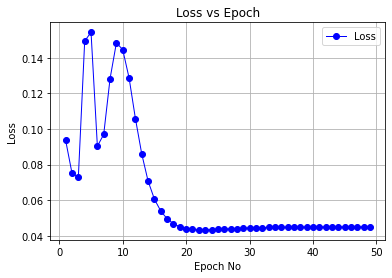

In [ ]:
#PLOT LOSS VS EPOCH CURVE
import matplotlib.pyplot as plt
plt.grid()
plt.plot(np.arange(1,50),np.array(list(dict_loss.values())),'bo-',label='Loss',linewidth=1)
plt.xlabel('Epoch No')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()

<font color='blue'>Plot between epochs and loss</font>

<font color='blue'>Comparision plot between epochs and loss with different optimizers</font>